# python机器学习之用逻辑回归制作评分卡（个人消费类贷款数据案例实战）

## 一、数据清洗

### 1、导库，获取数据

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。
#通常都是在建模过程中逐渐导入需要的库。
# data = pd.read_csv('../数据/rankingcard.csv',index_col=0)
# data.head()
data = pd.read_csv(r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\cs-training.csv").drop(columns = 'Unnamed: 0')
data.SeriousDlqin2yrs = data.SeriousDlqin2yrs.astype('int')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2、探索数据与数据预处理

In [15]:
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [16]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
data.info()
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [17]:
#探索缺失值
data.info()
# data.isnull().sum()/data.shape[0]#得到缺失值的比例
data.isnull().mean()#上一行代码的另一种形式书写

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

### 3、使用随机森林填补缺失值

In [18]:
def remove_outliers(df):
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] <= 10]
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTimes90DaysLate'] < 96]
    df = df.loc[(df['DebtRatio'] <= df['DebtRatio'].quantile(0.95))]
    df = df.loc[(df['age'] >= 20)]
    return df

data = remove_outliers(data)
data.shape
# 填充缺失值
data['NumberOfDependents'].fillna(0,inplace=True)

In [19]:
# def fill_missing_rf(X,y,to_fill):

#     """
#     使用随机森林填补一个特征的缺失值的函数

#     参数：
#     X：要填补的特征矩阵
#     y：完整的，没有缺失值的标签
#     to_fill：字符串，要填补的那一列的名称
#     """

#     #构建我们的新特征矩阵和新标签
#     df = X.copy()
#     fill = df.loc[:,to_fill]
#     df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

#     # 找出我们的训练集和测试集
#     Ytrain = fill[fill.notnull()]
#     Ytest = fill[fill.isnull()]
#     Xtrain = df.iloc[Ytrain.index,:]
#     Xtest = df.iloc[Ytest.index,:]

#     #用随机森林回归来填补缺失值
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(Xtrain, Ytrain)
#     Ypredict = rfr.predict(Xtest)

#     return Ypredict


# 写法1
# def fill_missing_rf(data,to_fill):
     
#     # 使用随机森林填补一个特征的缺失值的函数
#     # to_fill = 'MonthlyIncome'
#     train_data = data.dropna()
#     test_data = data.loc[data[to_fill].isna()]
#     print(data.shape,train_data.shape,test_data.shape)
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(train_data.loc[:,train_data.columns != to_fill], train_data[to_fill])
#     Ypredict = rfr.predict(test_data.loc[:,train_data.columns != to_fill])
#     return(Ypredict)
# 写法2

def fill_missing_rf(data,to_fill):
    # 使用随机森林填补一个特征的缺失值的函数
    # to_fill = 'MonthlyIncome'
    train_data = data.dropna()
    test_data = data.loc[data[to_fill].isna()].drop(columns=to_fill)
    print(data.shape,train_data.shape,test_data.shape)
    X=train_data.drop(columns=to_fill)
    y=train_data[to_fill]
    print(X.shape,y.shape)

    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=30)
    rfr = rfr.fit(X,y)
    Ypredict = rfr.predict(test_data)
    return(Ypredict)

In [20]:
y_pred = fill_missing_rf(data,to_fill = "MonthlyIncome")
data.loc[data["MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

(141703, 11) (119643, 11) (22060, 10)
(119643, 10) (119643,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141703 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      141703 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  141703 non-null  float64
 2   age                                   141703 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  141703 non-null  int64  
 4   DebtRatio                             141703 non-null  float64
 5   MonthlyIncome                         141703 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       141703 non-null  int64  
 7   NumberOfTimes90DaysLate               141703 non-null  int64  
 8   NumberRealEstateLoansOrLines          141703 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  141703 non-null  int64  
 10  NumberO

### 4、描述性统计处理异常值

In [21]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,141703.0,0.066738,0.249569,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,141703.0,5.863975,249.263592,0.0,0.0,0.003158,0.029567,0.15163,0.554887,0.978775,1.098292,50708.0
age,141703.0,52.269726,14.882573,21.0,24.0,32.000000,41.000000,52.00000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,141703.0,0.244850,0.692513,0.0,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,3.000000,10.0
DebtRatio,141703.0,140.634327,444.647550,0.0,0.0,0.030536,0.168248,0.34771,0.689655,375.000000,2196.000000,2458.0
MonthlyIncome,141703.0,5715.771011,13551.118543,0.0,0.0,0.366667,2325.000000,4679.00000,7588.500000,11000.000000,23916.980000,3008750.0
NumberOfOpenCreditLinesAndLoans,141703.0,8.382751,5.106872,0.0,0.0,3.000000,5.000000,8.00000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,141703.0,0.092496,0.491065,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,141703.0,0.976408,1.104625,0.0,0.0,0.000000,0.000000,1.00000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,141703.0,0.065503,0.331564,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,11.0


### 5、样本不均衡问题

In [22]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡
 
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：141703; 1占6.67%; 0占93.33%


### 6、使用采样方法来平衡样本

In [23]:
#如果报错，就在prompt安装：pip install imblearn
# import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%


样本个数：264492; 1占50.00%; 0占50.00%


### 7、分训练集和测试集

In [24]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
# model_data.to_csv(r".\model_data.csv")#训练数据
# vali_data.to_csv(r".\vali_data.csv")#验证数据

## 二、分箱

分箱步骤：

1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组

2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算

3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止

4）我们让一个特征分别分成[2,3,4…20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5）分箱完毕后，我们计算每个箱的WOE值， bad%，观察分箱效果

In [25]:
#“age”为例子
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)#等频分箱
model_data.head()
model_data["qcut"]
model_data["qcut"].value_counts()
 
#所有箱子的上限和下限
updown


array([ 21.,  28.,  31.,  33.,  36.,  38.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [26]:
[*zip(updown,updown[1:])]

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 33.0),
 (33.0, 36.0),
 (36.0, 38.0),
 (38.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 46.0),
 (46.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 109.0)]

In [27]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]

coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
 
#注意zip会按照最短列来进行结合
num_bins


[(21.0, 28.0, 4203, 7402),
 (28.0, 31.0, 3473, 5916),
 (31.0, 33.0, 2570, 4560),
 (33.0, 36.0, 4029, 6569),
 (36.0, 38.0, 3145, 4507),
 (38.0, 41.0, 5565, 8262),
 (41.0, 43.0, 3820, 5355),
 (43.0, 45.0, 4170, 5410),
 (45.0, 46.0, 2187, 3103),
 (46.0, 48.0, 4538, 5669),
 (48.0, 50.0, 4564, 5717),
 (50.0, 52.0, 4375, 5410),
 (52.0, 54.0, 4387, 4621),
 (54.0, 56.0, 4299, 3823),
 (56.0, 58.0, 4273, 3280),
 (58.0, 61.0, 6253, 4511),
 (61.0, 64.0, 6492, 3033),
 (64.0, 68.0, 6272, 2186),
 (68.0, 74.0, 6533, 1828),
 (74.0, 109.0, 7519, 1315)]

In [28]:
num_bins[0][2:]

(4203, 7402)

In [29]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue

    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
        break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
    range(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """


In [30]:
num_bins

[(21.0, 28.0, 4203, 7402),
 (28.0, 31.0, 3473, 5916),
 (31.0, 33.0, 2570, 4560),
 (33.0, 36.0, 4029, 6569),
 (36.0, 38.0, 3145, 4507),
 (38.0, 41.0, 5565, 8262),
 (41.0, 43.0, 3820, 5355),
 (43.0, 45.0, 4170, 5410),
 (45.0, 46.0, 2187, 3103),
 (46.0, 48.0, 4538, 5669),
 (48.0, 50.0, 4564, 5717),
 (50.0, 52.0, 4375, 5410),
 (52.0, 54.0, 4387, 4621),
 (54.0, 56.0, 4299, 3823),
 (56.0, 58.0, 4273, 3280),
 (58.0, 61.0, 6253, 4511),
 (61.0, 64.0, 6492, 3033),
 (64.0, 68.0, 6272, 2186),
 (68.0, 74.0, 6533, 1828),
 (74.0, 109.0, 7519, 1315)]

### 定义WOE和IV函数

In [31]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
 
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
 
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

### 卡方检验，合并箱体，画出IV曲线

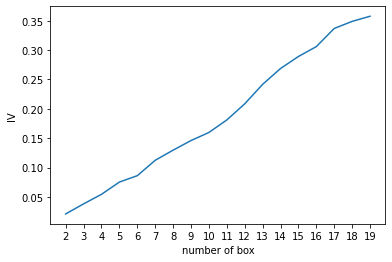

In [32]:
num_bins_ = num_bins.copy()
 
import matplotlib.pyplot as plt
import scipy
 
IV = []
axisx = []
 
while len(num_bins_) > 2:#大于设置的最低分箱个数
    pvs = []
    #获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2: ]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]#p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组
    # i = pvs.index(max(pvs))
    i = pvs.index(min(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
#选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6


### 用最佳分箱个数分箱，并验证分箱结果

In [33]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        print(pvs)
        # i = pvs.index(max(pvs))
        i = pvs.index(min(pvs))
        print("选择的是："+str(i)+","+str(pvs[i]))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
 
afterbins = get_bin(num_bins,6)
# print(num_bins)
afterbins


[0.2535310945221227, 0.21759365063526778, 0.008117917659107934, 2.7497645129733832e-05, 0.22826084900340335, 0.03725128527279372, 0.00915162712186696, 0.010398136904636248, 0.00021916876607992825, 0.9341628748908583, 0.6600468896812841, 4.6869833219768566e-08, 3.5270617012483e-08, 5.056938998644097e-06, 0.04228263666873225, 1.676237420656364e-49, 1.0685237939124085e-18, 1.5486758177902417e-09, 3.3469259900522616e-32]
选择的是：15,1.676237420656364e-49
[0.2535310945221227, 0.21759365063526778, 0.008117917659107934, 2.7497645129733832e-05, 0.22826084900340335, 0.03725128527279372, 0.00915162712186696, 0.010398136904636248, 0.00021916876607992825, 0.9341628748908583, 0.6600468896812841, 4.6869833219768566e-08, 3.5270617012483e-08, 5.056938998644097e-06, 2.3402594602715832e-21, 2.1443976302565612e-76, 1.5486758177902417e-09, 3.3469259900522616e-32]
选择的是：15,2.1443976302565612e-76
[0.2535310945221227, 0.21759365063526778, 0.008117917659107934, 2.7497645129733832e-05, 0.22826084900340335, 0.037251

[(21.0, 28.0, 4203, 7402),
 (28.0, 31.0, 3473, 5916),
 (31.0, 33.0, 2570, 4560),
 (33.0, 36.0, 4029, 6569),
 (36.0, 38.0, 3145, 4507),
 (38.0, 109.0, 75247, 63523)]

In [34]:
bins_df = get_woe(num_bins)
 
bins_df
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好


,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4203,7402,11605,0.062681,0.637829,0.045356,0.080042,-0.568004
1,28.0,31.0,3473,5916,9389,0.050712,0.630099,0.037478,0.063973,-0.534694
2,31.0,33.0,2570,4560,7130,0.038511,0.639551,0.027734,0.049310,-0.575469
3,33.0,36.0,4029,6569,10598,0.057242,0.619834,0.043478,0.071034,-0.490896
4,36.0,38.0,3145,4507,7652,0.041330,0.588996,0.033939,0.048736,-0.361870
5,38.0,109.0,75247,63523,138770,0.749525,0.457757,0.812015,0.686906,0.167322


### 6、将选取最佳分箱个数的过程包装为函数

In [35]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df


### 对所有特征进行分箱选择

RevolvingUtilizationOfUnsecuredLines


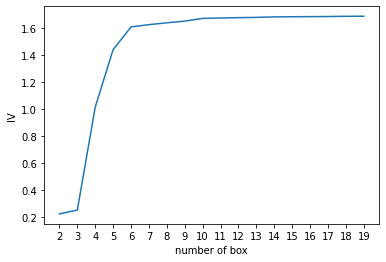

age


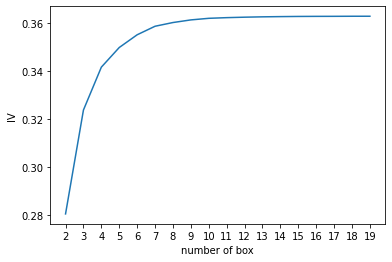

NumberOfTime30-59DaysPastDueNotWorse


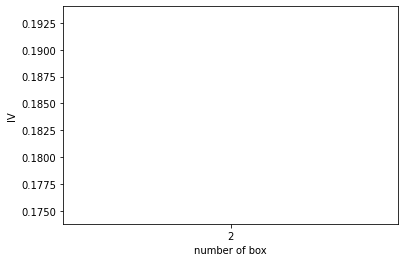

DebtRatio


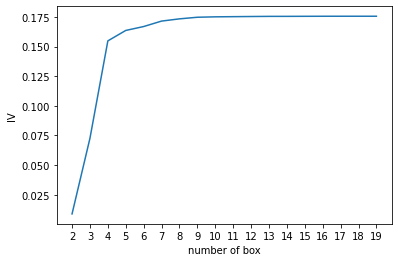

MonthlyIncome


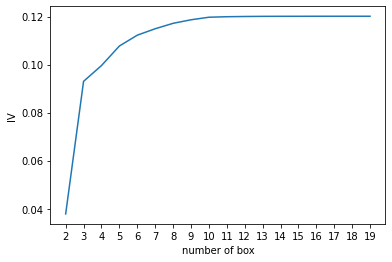

NumberOfOpenCreditLinesAndLoans


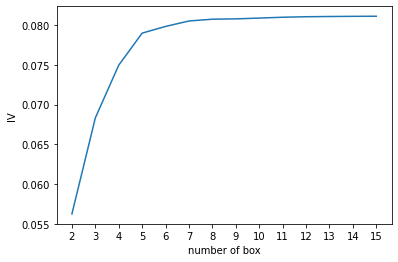

NumberOfTimes90DaysLate


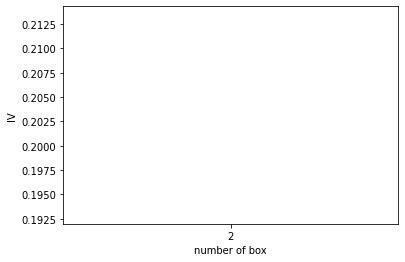

NumberRealEstateLoansOrLines


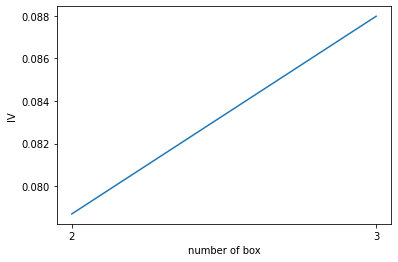

NumberOfTime60-89DaysPastDueNotWorse


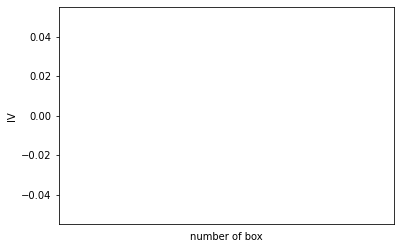

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [36]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)


In [ ]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}


In [ ]:
hand_bins

In [ ]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col


## 三、计算各箱的WOE并映射到数据中

In [ ]:
data = model_data.copy()
 
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
 
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
 
data.head()

#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
 
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
 
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

bins_df


### 包装成函数

In [ ]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall


In [ ]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()


## 四、建模与模型验证

In [ ]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]


In [ ]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)#0.8641356370249832

In [ ]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [ ]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)


## 五、制作评分卡

In [ ]:
# pdo =20 ,特定分数为60 , odds = 1/60
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

In [ ]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数


In [ ]:
file = r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")
